In [1]:
from IPython.display import display, HTML
display(HTML("<style>.container { width:100% !important; }</style>"))


# Useful Information related to the Habermans dataset. 

1. Title: Haberman's Survival Data

2. Sources:
   (a) Donor:   Tjen-Sien Lim (limt@stat.wisc.edu)
   (b) Date:    March 4, 1999

3. Relevant Information:
   The dataset contains cases from a study that was conducted between
   1958 and 1970 at the University of Chicago's Billings Hospital on
   the survival of patients who had undergone surgery for breast
   cancer.

4. Number of Instances: 306

5. Number of Attributes: 4 (including the class attribute)

6. Attribute Information:
   1. Age of patient at time of operation (numerical)
   2. Patient's year of operation (year - 1900, numerical)
   3. Number of positive axillary nodes detected (numerical)
   4. Survival status (class attribute) :
         1 = the patient survived 5 years or longer and
         2 = the patient died within 5 year

# 1.1) Analyze high level statistics of the dataset: number of points, numer of features, number of classes, data-points per class.

In [1]:
#Importing all the required libraries
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sbn
import warnings
warnings.filterwarnings("ignore")

In [2]:
"""At first we notice that there are no column names given for this dataset. So we will load this dataset in a pandas frame by explicitly defining the column names. 
In this dataset, we will take four column names. They are – Age, Operation_Year, Axillary_Nodes, Survival Status.""" 

haberman = pd.read_csv(r'/Users/rohan/Documents/1)Online Courses/1)Applied AI/2)Assignments/4)EDA/haberman.csv') 
#names = ['Age', 'Operation_Year', 'Axillary_Nodes', 'Survival_Status'])

#df.columns = ['new_col1', 'new_col2', 'new_col3', 'new_col4']
haberman.columns = ['Age', 'Operation_Year', 'Axillary_Nodes', 'Survival_Status']

#Let's find out the number of data-points and features in our dataset
print (haberman.shape)

#Now let's find and confirm the column names in our dataset
print (haberman.columns)

(306, 4)
Index(['Age', 'Operation_Year', 'Axillary_Nodes', 'Survival_Status'], dtype='object')


In [3]:
"""Now we will find how many data points for each classes are present, i.e. get an idea how the survival rate is 
distributed across the entire dataset and whether our dataset is balanced or imbalanced."""

haberman['Survival_Status'].value_counts()

1    225
2     81
Name: Survival_Status, dtype: int64

In [4]:
haberman.head()

,Age,Operation_Year,Axillary_Nodes,Survival_Status
0,30,64,1,1
1,30,62,3,1
2,30,65,0,1
3,31,59,2,1
4,31,65,4,1


In [5]:
#Get more information about the dataset
haberman.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 306 entries, 0 to 305
Data columns (total 4 columns):
 #   Column           Non-Null Count  Dtype
---  ------           --------------  -----
 0   Age              306 non-null    int64
 1   Operation_Year   306 non-null    int64
 2   Axillary_Nodes   306 non-null    int64
 3   Survival_Status  306 non-null    int64
dtypes: int64(4)
memory usage: 9.7 KB


In [10]:
"""Here it will be easier for us to visualize the data, if we encode the output variables to something more meaningfull.
For this problem, I have just renamed the 1s and 2s to Yes and No respectively and explicitly defined them as categories."""
#Source : https://pandas.pydata.org/pandas-docs/stable/categorical.html"""
#Updated Source: https://pandas.pydata.org/pandas-docs/stable/user_guide/categorical.html

#haberman["Survival_Status"] = haberman["Survival_Status"].map({'1':"Yes", '2':"No"})
haberman["Survival_Status"] = haberman["Survival_Status"].replace([1,2], ["Yes","No"])
# https://datatofish.com/replace-values-pandas-dataframe/
#https://stackoverflow.com/questions/59584830/pandas-series-map-changes-values-to-nan

haberman["Survival_Status"] = haberman["Survival_Status"].astype("category")

#Let's verify what we have done here
haberman['Survival_Status'].value_counts()

Yes    225
No      81
Name: Survival_Status, dtype: int64

In [11]:
#Let's get an idea about the high level statistics of the haberman dataset
print(haberman.describe())

              Age  Operation_Year  Axillary_Nodes
count  306.000000      306.000000      306.000000
mean    52.457516       62.852941        4.026144
std     10.803452        3.249405        7.189654
min     30.000000       58.000000        0.000000
25%     44.000000       60.000000        0.000000
50%     52.000000       63.000000        1.000000
75%     60.750000       65.750000        4.000000
max     83.000000       69.000000       52.000000


In [12]:
haberman.head()

,Age,Operation_Year,Axillary_Nodes,Survival_Status
0,30,64,1,Yes
1,30,62,3,Yes
2,30,65,0,Yes
3,31,59,2,Yes
4,31,65,4,Yes


# High Level statistics of the haberman dataset

1. The dataset contains 306 records, with 3 features (Age, Axillary_Nodes, Operation_Year) and one class label (Survival_Status)
2. The dataset is imbalanced with the class ariable containing 225 (73.6%) patients who has survived more than 5 years and 81 (26.4%) patients who didn't.
3. The median age of all the patients is 52, with the patient's age varrying from 30 to 83 years.
4. Almost 75% of the patients are less than 61 years of age and were operated before 1966.
5. The maximum number of Axillary nodes obeserved in a single patient is 52 and the minimum is ofcourse 0.
6. Almost 75% patients has less than 5 axillary nodes, and 25% patients has 0 axillary nodes. This is quite less compared to the maximum number of axillary nodes observed in a patient, that is 52.
7. Most of the operations has taken place between 1960 and 1966. As of now, the operation year might not have a significance on the survival of the patients. But considering how medical science has evolved over the years, we might be able to find some co-relation between the operation year and the survival rate of patients.

# 1.2) Explain the objective of the problem.

# Objective:

Our mission here is to determine whether or not a patient is going to survive more than 5 years based on the given data : his age, year of operation and the number of postive axillary nodes detected. Basically, we will need to study the co-relations between the different features and the output variable.

# 1.3) Perform Univariate analysis - Plot PDF, CDF, Boxplot, Voilin plots

# Univariate analysis of the feature variables using Histogram, PDF, CDF, Box Plots and Violin Plots.

Here we will use distribution plots to visualize how the data points are distributed with respect to their frequencies. Generally we take the data points in the X-Axis, and the height of the plot signifies what is the frequency of each data point. The spread represents how widely the data points are distributed on either side of the median value. We need distribution plots to visually see the data and understand any patterns in the given data. Distribution plots will give us an idea how the data is distributed in a 2D space and we can more easily come to a conclusion in a more robust and quantitative manner, just by visually looking at the distribution which would not have been possible just by seeing the High Level Statistics of the data.

1. First we plot a Histogram : In a histogram the data points are grouped into bins. Each of these bins represents one single group of data. The heights of these bins gives us an idea about the frequency of data lying in a particular interval, i.e. that group. If more data points are added to a bin (our group of data) then the height of the bins increases. This further means that the frequency of the data lying in that particular bin increases. Thus in general height represents the percentage of data points falling in that interval.


2. Probability Density Function (PDF) : This is actually a smoothed form of histogram. Tells us how dense each of the regions are. In other words PDF generally tells what is the probability of any data point belonging to a particular range in X-Axis. It is maximum in the middle and decreases on either ways. So if we want to build a model using only one particular feature we can make use of this histogram or PDF. Please note that the area under the PDF curve is always 1 unit.


3. Cumulative Distribution Function (CDF) : CDF is nothing but an integral sum of the area under the curve enclosed by the PDF. Using CDF we can find things like what percentage of data points are likely to be less than a given value in X-Axis.


4. Box Plots : A box plot sumarizes informations about the following key things in our data. 


      1. The 25th, 50th(also called the median) and 75th percentile values of our distribution.
      2. The Inter Quantile Range (IQR) -> 75th percentile - 25th percentile
      3. The spread of the whiskers is measured by (75th percentile + 1.5*IQR) and (25th percentile - 1.5*IQR)
      4. Any outliers in the dataset are displayed as points outside the box. Outliers are mostly exceptions which does not have a huge significance on our prediction.
      5. Note : An outlier is an observation that is numerically distant from the rest of the data. The are called outliers because they "lie outside" the range in which we expect them. 
         When reviewing a boxplot, an outlier is defined as a data point that is located outside the fences (“whiskers”) of the boxplot (e.g: outside 1.5 times the interquartile range 
         above the upper quartile and bellow the lower quartile)

                                                                  
         
      
5. Violin Plots : Violin Plots are a combination of PDFs and Box Plots in one single figure, thus allowing us more flexibility. It gives us almost all the tools that we need to visualize our data.
 

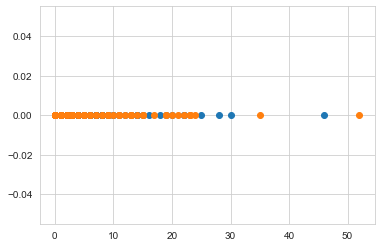

In [13]:
#Plotting a 1-D Scatter plot
survival_yes = haberman.loc[haberman["Survival_Status"] == "Yes"]
survival_no = haberman.loc[haberman["Survival_Status"] == "No"]
sbn.set_style("whitegrid");

#1-D Scatter plot Axillary_Nodes
plt.plot(survival_yes["Axillary_Nodes"], np.zeros_like(survival_yes['Axillary_Nodes']), 'o')
plt.plot(survival_no["Axillary_Nodes"], np.zeros_like(survival_no['Axillary_Nodes']), 'o')
plt.show()

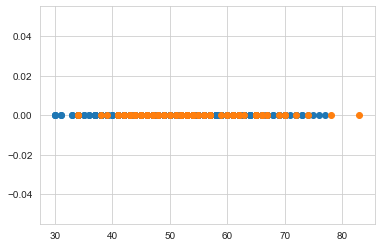

In [14]:
#1-D Scatter plot of Age
plt.plot(survival_yes["Age"], np.zeros_like(survival_yes['Age']), 'o')
plt.plot(survival_no["Age"], np.zeros_like(survival_no['Age']), 'o')
plt.show()

# Observations from the two 1-D Scater plots :

1. From the scatter plot of Axillary Nodes, we can say that most patients having Axillary Nodes less than 15 has survived.
2. From the scatter plot of Age, we can say that Most people aged 42-58 has survived.
  
However, at this point it's very hard for us to strictly say that the above observations are correct. We will analyse further using Histograms, PDFs and CDFs to come to more robust conclusion.

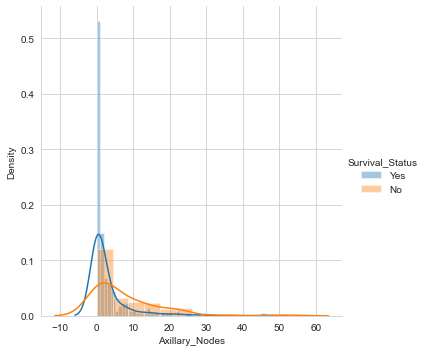

In [15]:
#Histogram of Axillary_Nodes
sbn.FacetGrid(haberman, hue = "Survival_Status", size=5).map(sbn.distplot, "Axillary_Nodes").add_legend();
plt.show();

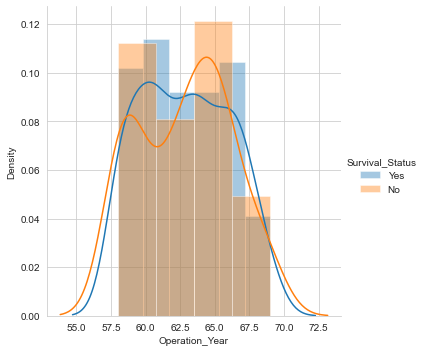

In [16]:
#Histogram of Operation_Year
sbn.FacetGrid(haberman, hue = "Survival_Status", size=5).map(sbn.distplot, "Operation_Year").add_legend();
plt.show();

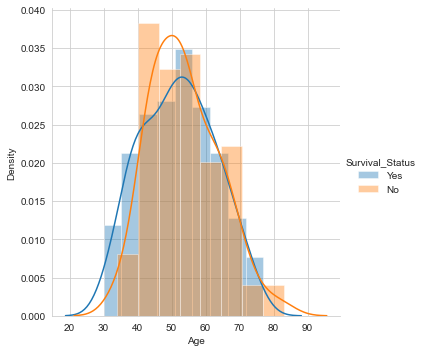

In [17]:
#Histogram of Age
sbn.FacetGrid(haberman, hue = "Survival_Status", size=5).map(sbn.distplot, "Age").add_legend();
plt.show();

#     Observations from the Histogram :

1. From the above Histogram we can see that there is a massive overlap observed between survival statuses when we take Age and Operation_Year as our X-Axes in two seperate plots. 
   So we cannot strictly come to a conlusion on how to seperate these two features.
2. However, in case of number of Axillary Nodes we can see that most patients who has less than 5 axillary nodes has survived since the number of axillary nodes of all the patients who has 
   survived is most dense in the region 0 to 5.
3. The survival status of patients having more than 5 axillary nodes has drastically reduced on increases of the number of axillary nodes. For example if we consider the number of nodes to be between 5 and 10, we can clearly see that the survival rate has dropped by almost 91% than what it was in the interval of 0 to 5 axillary nodes. 
4. The survival rate drops to almost 0% (approx), i.e. it's almost certain that a person is going to die when the number of axillary nodes detected is roughly more than 30"

[0.83555556 0.08       0.02222222 0.02666667 0.01777778 0.00444444
 0.00888889 0.         0.         0.00444444]
[ 0.   4.6  9.2 13.8 18.4 23.  27.6 32.2 36.8 41.4 46. ]


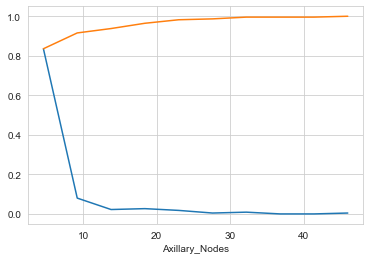

In [18]:
"""Plot PDF and CDF of Axillary Nodes"""

#PDF
counts, bin_edges = np.histogram(survival_yes['Axillary_Nodes'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Axillary_Nodes")
plt.show();

[0.18666667 0.10666667 0.10222222 0.07111111 0.09777778 0.10222222
 0.06666667 0.09777778 0.09333333 0.07555556]
[58.  59.1 60.2 61.3 62.4 63.5 64.6 65.7 66.8 67.9 69. ]


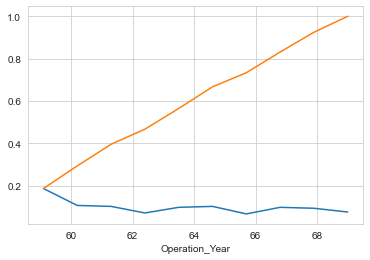

In [19]:
"""Plot PDF and CDF of Operation Year"""

#PDF   
counts, bin_edges = np.histogram(survival_yes['Operation_Year'], bins=10, density=True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Operation_Year")
plt.show();

[0.05333333 0.10666667 0.12444444 0.09333333 0.16444444 0.16444444
 0.09333333 0.11111111 0.06222222 0.02666667]
[30.  34.7 39.4 44.1 48.8 53.5 58.2 62.9 67.6 72.3 77. ]


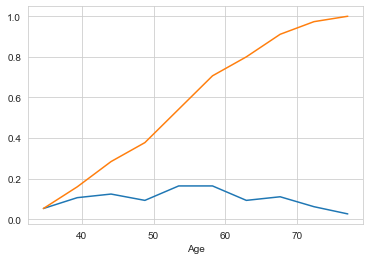

In [20]:
"""Plot PDF and CDF of Age"""

#PDF
counts, bin_edges = np.histogram(survival_yes['Age'], bins=10, density = True)
pdf = counts/(sum(counts))
print(pdf);
print(bin_edges)

#CDF
cdf = np.cumsum(pdf)
plt.plot(bin_edges[1:], pdf)
plt.plot(bin_edges[1:], cdf)
plt.xlabel("Age")
plt.show();


# Observations from the above PDFs and CDFs :

1. Nearly 80% survivors has number of axillary nodes detected less than or equal to 5.
2. Nearly 2.5% of the survivors has number of axillary nodes detected between 20 and 30.
3. Nearly 1% of the survivors has number of axillary nodes detected more than 30.
4. Almost 77% survivors are less than 60 years of age and almost 18% survivors are less than the age 40.

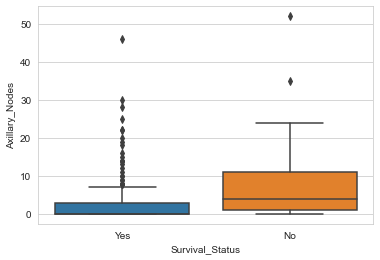

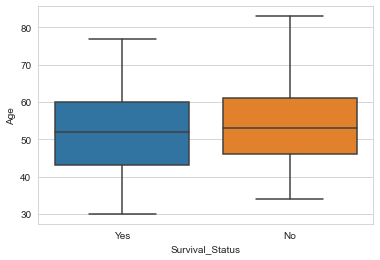

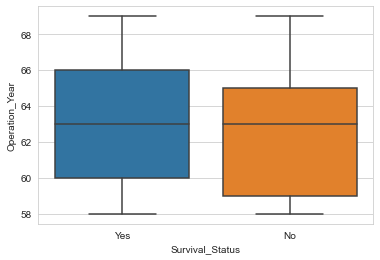

In [21]:
""" Plotting a Box-Plot to get a visualization of the Median, IQR and the distribution of the values"""

#Box Plot for the feature Axillary_Nodes
sbn.boxplot(x = 'Survival_Status', y ='Axillary_Nodes', data = haberman)
plt.show()

#Box Plot for the feature Age
sbn.boxplot(x = 'Survival_Status',y = 'Age', data = haberman)
plt.show()

#Box Plot for the feature Operation_Year
sbn.boxplot(x = 'Survival_Status', y = 'Operation_Year', data = haberman)
plt.show()

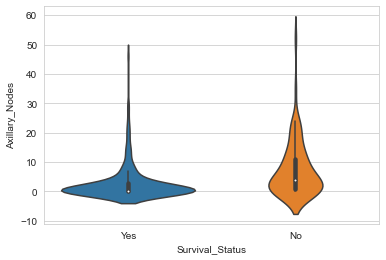

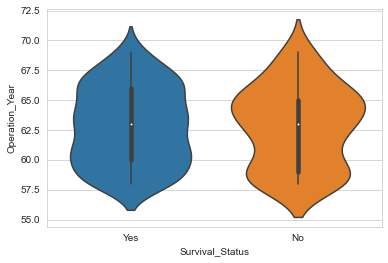

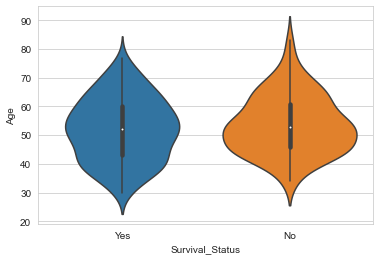

In [22]:
#Violin Plots for Axillary_Nodes
sbn.violinplot(x = "Survival_Status", y = "Axillary_Nodes", data = haberman, size = 8)
plt.show()

#Violin Plots for Operation_Year
sbn.violinplot(x = "Survival_Status", y = "Operation_Year", data = haberman, size = 8)
plt.show()

#Violin Plots for Age
sbn.violinplot(x = "Survival_Status", y = "Age", data = haberman, size = 8)
plt.show()

# Observations from the above Box Plotand Violin Plots :

1. The chances of survival of the patients are slightly better when they are treated after the year 1966 and the number of survivors are slightly less when they were treated before 1959.
2. People below the age of 45 mostly survived. People beyond the age of 60 mostly died.

# 1.4) Perform Bivariate analysis - Plot 2D Scatter plots and Pair plots

# Bi-variate analysis of the feature variables using Pair Plots.

Pair Plots : Pair Plots are nothing but combinations of pair wise scatter plots. Here we have 3 features and we will select 2 of them each time. So the total number of combinations of pair plots will be 3C2 that is equal to 3. The diagnal are nothing but the Histograms of each pair.

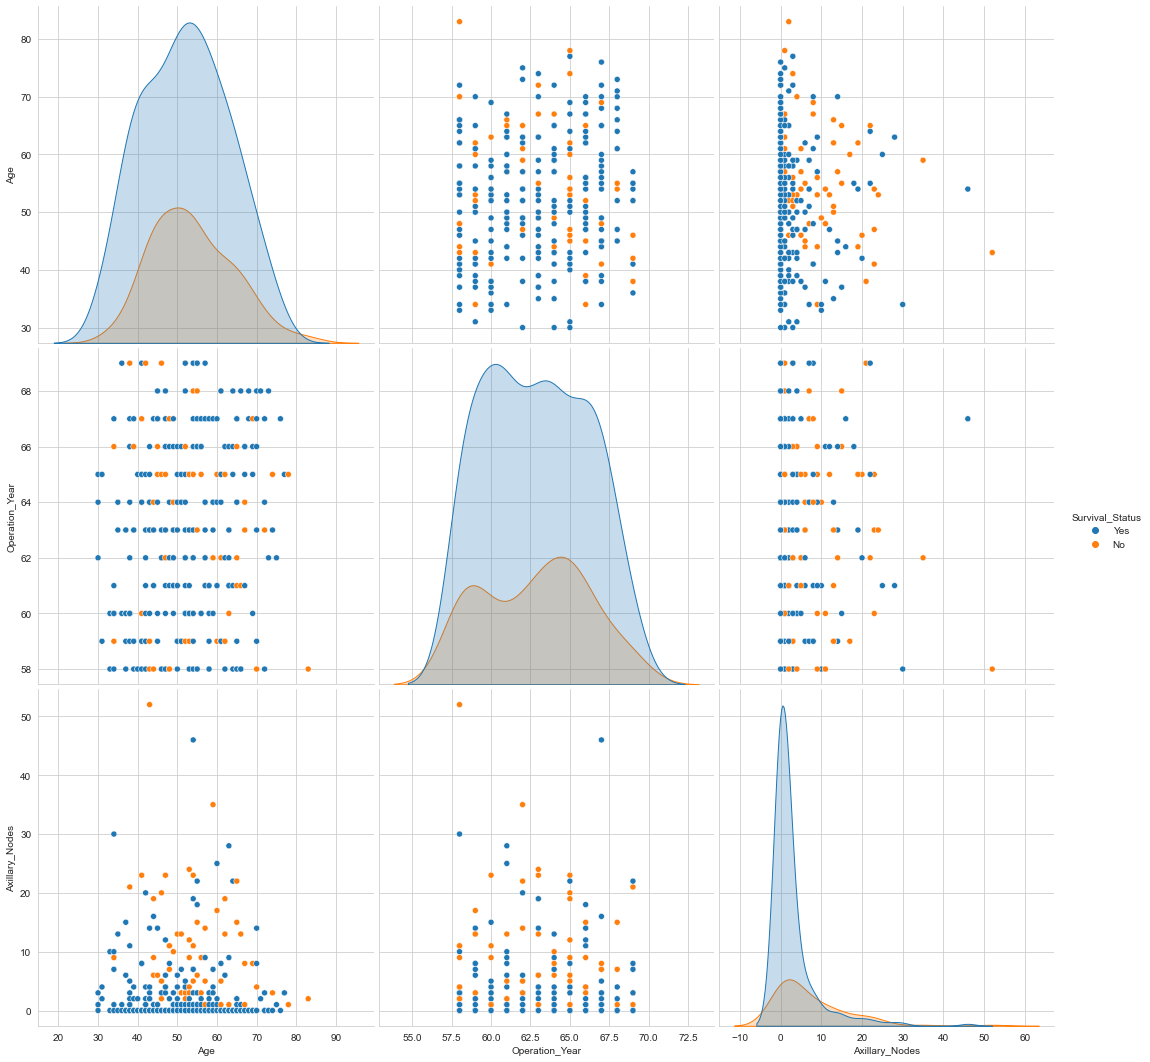

In [23]:
#Plotting a pair plot
sbn.pairplot(haberman, hue= "Survival_Status", size = 5);
plt.show()

# Observations from the above Pair Plot :

1. By scattering the data points between Axillary Nodes and Age we can find that patients having axillary nodes 0 or 1 has the most survival rates.
2. The two classes are impossible to seperate by scattering the data between Age and Operation Year
3. If we consider the scattered data between the number of axillary nodes and operation year, the two classes are more seperable than other plots.
   Also if we notice carefully, we can say that the survival rates of patients are highest when they have less than 4 axillary nodes, however there are a some rare few instances
   where the patients have not survived after 5 years even with less than 4 axillary nodes

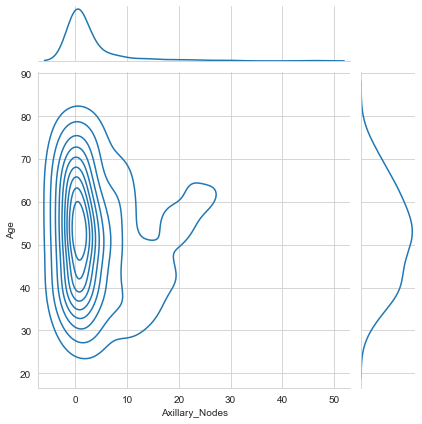

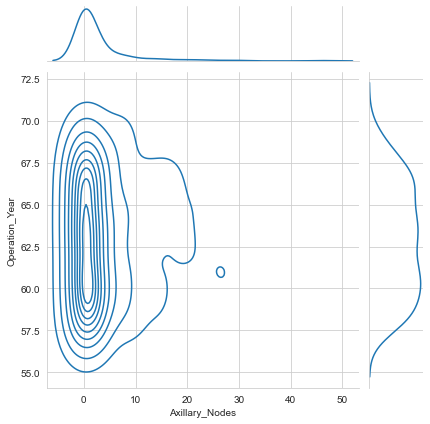

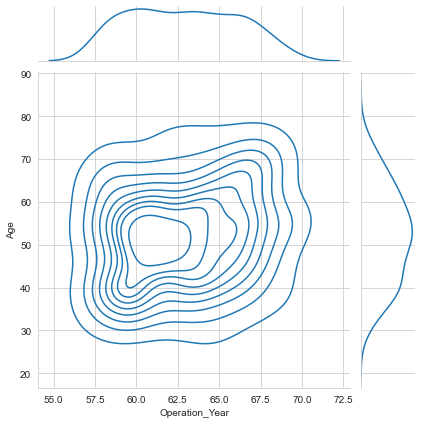

In [24]:
#2D Density plot, contors-plot
sbn.jointplot(x="Axillary_Nodes", y="Age", data=survival_yes, kind="kde");
plt.show();

#2D Density plot, contors-plot
sbn.jointplot(x="Axillary_Nodes", y="Operation_Year", data=survival_yes, kind="kde");
plt.show();

#2D Density plot, contors-plot
sbn.jointplot(x="Operation_Year", y="Age", data=survival_yes, kind="kde");
plt.show();

# Observations from the above 2-D Contour Plot :

1. It is somewhat possible for us to classify the patients. From the Age vs Operation_Year plot we can make out that most patients who were operated between year 1960 and 1962 and aged 48 to 52, has the highest rate of survival. 
2. The survival rates of patients having more than 5 axillary nodes decreses a lot

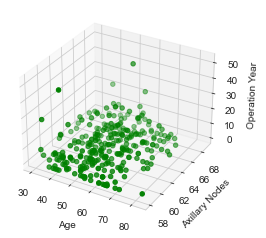

In [25]:
#3-D Plot
from mpl_toolkits.mplot3d import Axes3D
fig = plt.figure()
ax = fig.add_subplot(111, projection = '3d')
xs = np.array(haberman['Age']) ;ys = np.array(haberman['Operation_Year']) ;zs = np.array(haberman['Axillary_Nodes'])
ax.scatter(xs, ys, zs, zdir = 'z', c = ['g'])
ax.set_xlabel('Age')
ax.set_ylabel('Axillary Nodes')
ax.set_zlabel('Operation Year')
plt.show()
